# Decision Trees and Ensemble Learning

### Import Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Importing + Reading the Data

In [2]:
# import wget

# wget.download('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv')

df = pd.read_csv('CreditScoring.csv')

### Understanding the Data

In [3]:
df.sample(10)

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
975,1,19,2,12,42,2,1,1,90,464,5000,0,1100,2413
123,1,18,1,60,54,2,1,1,66,214,0,0,1300,1307
1695,1,25,2,36,59,1,1,3,35,19,5500,1500,425,1175
1402,2,0,2,60,30,2,1,4,60,78,3500,0,1250,1365
47,1,15,2,36,47,2,1,1,75,289,3500,0,1500,2154
447,2,2,1,48,36,2,1,1,85,95,0,0,1340,1771
3551,1,18,2,60,42,2,1,1,45,172,3500,0,1850,2034
497,2,20,2,36,40,1,2,3,35,0,8500,400,750,1100
2413,1,4,2,60,41,2,1,1,45,87,6500,0,1100,1670
1309,1,0,1,24,23,1,1,1,42,70,0,0,125,125


In [4]:
df.shape

(4455, 14)

In [5]:
df.nunique()

Status          3
Seniority      47
Home            7
Time           11
Age            50
Marital         6
Records         2
Job             5
Expenses       94
Income        353
Assets        160
Debt          183
Amount        285
Price        1419
dtype: int64

In [6]:
df.columns = df.columns.str.lower()

#### Null Values

In [7]:
df.isnull().sum()

status       0
seniority    0
home         0
time         0
age          0
marital      0
records      0
job          0
expenses     0
income       0
assets       0
debt         0
amount       0
price        0
dtype: int64

No null values in the data frame; however, according to the original author, there are missing values encoded as 99999999.0... 

In [8]:
df.describe().round()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,1.0,8.0,3.0,46.0,37.0,2.0,1.0,2.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,0.0,8.0,2.0,15.0,11.0,1.0,0.0,1.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,0.0,0.0,6.0,18.0,0.0,1.0,0.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,1.0,2.0,2.0,36.0,28.0,2.0,1.0,1.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,1.0,5.0,2.0,48.0,36.0,2.0,1.0,1.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,2.0,12.0,4.0,60.0,45.0,2.0,1.0,3.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,2.0,48.0,6.0,72.0,68.0,5.0,2.0,4.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


`income`, `assets` and `debt` both have maximum values of 99999999.0, so contain missing values. We can adress this by replacing 99999999.0 with nan:

In [9]:
for col in ['income', 'assets', 'debt']:
    df[col] = df[col].replace(to_replace=99999999, value=np.nan)

In [10]:
df.describe().round()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,1.0,8.0,3.0,46.0,37.0,2.0,1.0,2.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,0.0,8.0,2.0,15.0,11.0,1.0,0.0,1.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,0.0,0.0,6.0,18.0,0.0,1.0,0.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,1.0,2.0,2.0,36.0,28.0,2.0,1.0,1.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,1.0,5.0,2.0,48.0,36.0,2.0,1.0,1.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,2.0,12.0,4.0,60.0,45.0,2.0,1.0,3.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,2.0,48.0,6.0,72.0,68.0,5.0,2.0,4.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


Now that we have repalced the 99999999.0 values, the averaging and quartile quantities are more representative.

#### Duplicate Values

In [11]:
df.loc[df.duplicated()]

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
1022,2,5,2,60,36,2,1,3,90,62.0,3000.0,0.0,650,1295
2929,1,4,2,60,37,2,1,3,35,128.0,18000.0,0.0,800,1560


#### Preprocessing Categorical Values

In [12]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unknown'
}

home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unknown'
}

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unknown'
}

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unknown'
}

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unknown'
}

df.status   = df.status.map(status_values)
df.home     = df.home.map(home_values)
df.marital  = df.marital.map(marital_values)
df.records  = df.records.map(records_values)
df.job      = df.job.map(job_values)

Removing 'unknown' status (missing variable according to original author)

In [13]:
df = df[df['status'] != 'unknown'].reset_index(drop=True)

### Validation Framework

In [14]:
from sklearn.model_selection import train_test_split

full_train, test= train_test_split(df, test_size=0.2, random_state=11)
train, val = train_test_split(df, test_size=0.25, random_state=11)

train.reset_index(drop=True)
val.reset_index(drop=True)
full_train.reset_index(drop=True)
test.reset_index(drop=True)

y_train = (train.status == 'default').astype('int').values
y_val = (val.status == 'default').astype('int').values
y_full_train = (full_train.status == 'default').astype('int').values
y_test = (test.status == 'default').astype('int').values

del train['status']
del val['status']
del full_train['status']
del test['status']

### Decision Trees

A type of supervised machine learning which uses IF, THEN, ELSE rules to determine an outcome. Can be used in both classification and regression problems.

In [15]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'

The above codeblock is an example of a decision tree.

In [16]:
assess_risk(df.iloc[(np.random.randint(len(df), size=1))[0]])

'default'

Testing the function on a random client entry.

#### Training Decision Tree Classifier

In [17]:
from sklearn.feature_extraction import DictVectorizer

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

from sklearn.metrics import roc_auc_score

In [18]:
train_dicts = train.fillna(0).to_dict(orient='records')
val_dicts = val.fillna(0).to_dict(orient='records')

dv = DictVectorizer()

X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.6482264990002082

An AUC score of 0.6 - 0.7 is not particularly impressive; therefore, we examine model performance of the training set to gauge overfitting.

In [19]:
roc_auc_score(y_train, dt.predict_proba(X_train)[:,1])

1.0

Results return a perfect score of 1 inferring overfitting. The model has memorised the original training data and fails to generalise its training to new data.

This is a common occurence in decision trees with infinite depth; hence, we want to limit the maximum depth of our decision trees!

In [20]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print(f'Train: {auc:25}')

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print(f'Validation: {auc:20}')

Train:        0.8000466217904103
Validation:   0.7799947358703296


Upon limiting the max_depth of our decision tree model, performance on the validation set is significantly improved.

In [21]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 73.50
|   |   |   |--- assets <= 4250.00
|   |   |   |   |--- class: 0
|   |   |   |--- assets >  4250.00
|   |   |   |   |--- class: 0
|   |   |--- income >  73.50
|   |   |   |--- seniority <= 5.50
|   |   |   |   |--- class: 0
|   |   |   |--- seniority >  5.50
|   |   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- assets <= 7250.00
|   |   |   |--- time <= 27.00
|   |   |   |   |--- class: 0
|   |   |   |--- time >  27.00
|   |   |   |   |--- class: 1
|   |   |--- assets >  7250.00
|   |   |   |--- amount <= 1562.50
|   |   |   |   |--- class: 0
|   |   |   |--- amount >  1562.50
|   |   |   |   |--- class: 1
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- seniority <= 1.50
|   |   |   |--- assets <= 4750.00
|   |   |   |   |--- class: 1
|   |   |   |--- assets >  4750.00
|   |   |   |   |--- class: 1
|   |   |--- seniority >  1.50
|   |   |   |--- amount <= 939.50
|   |  

#### Tuning Decision Tree Model

Most important variables are `max_depth` and `min_samples_leaf`.

In [22]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.601
   2 -> 0.662
   3 -> 0.740
   4 -> 0.781
   5 -> 0.782
   6 -> 0.778
  10 -> 0.687
  15 -> 0.673
  20 -> 0.663
None -> 0.669


Tree should have 4-6 max_depth (layers). Now, with each of these depth values, we can vary min_samples_leaf to find an optimal combination.

In [23]:
scores = []

for depth in [4, 5, 6]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [24]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [25]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.781  0.781  0.779
5                 0.779  0.784  0.782
10                0.779  0.783  0.776
15                0.779  0.782  0.777
20                0.776  0.781  0.779
100               0.770  0.779  0.788
200               0.770  0.783  0.783
500               0.729  0.729  0.729

[Text(0.5, 0, '4'), Text(1.5, 0, '5'), Text(2.5, 0, '6')]

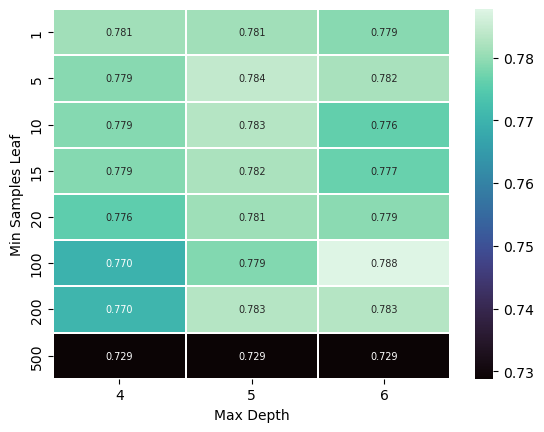

In [26]:
ax = sns.heatmap(df_scores_pivot, linewidths=0.3, cmap='mako', annot = True, annot_kws = {'size': 7}, fmt='.3f')

ax.set(xlabel="Max Depth", ylabel="Min Samples Leaf")

ax.set_xticklabels([4, 5, 6])

From the heatmap it is clear which combinations of min_samples_leaf and max_depth are more effective together.

### Random Forest and Ensemble Learning

A random forest is essentially a collection of n decision trees which is random in the sense that each tree is uniquely generated.

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rf = RandomForestClassifier(n_estimators=10, random_state=1, n_jobs=-1)

rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_val)[:, 1]

roc_auc_score(y_val, y_pred)

0.7889594701299926

Using a random forest outputs a score which rivals our optimised decision tree model.

In [29]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

In [30]:
rf_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

[Text(0.5, 0, 'Number of estimators'), Text(0, 0.5, 'AUC')]

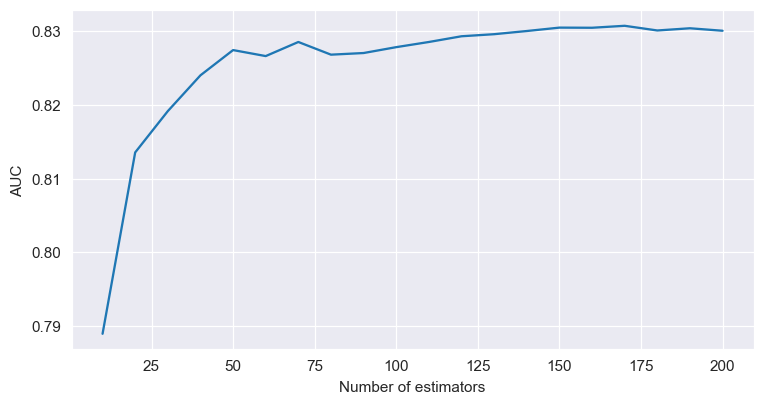

In [31]:
plt.figure(figsize=(8, 4), dpi=110)

sns.set_style('darkgrid')

ax = sns.lineplot(x='n_estimators', y='auc', data=rf_scores)

ax.set(xlabel='Number of estimators', ylabel='AUC')

After 50 estimators, the improvements in AUC are diminishing.

In [32]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [33]:
columns = ['max_depth', 'n_estimators', 'auc']
rf_scores_2 = pd.DataFrame(scores, columns=columns)

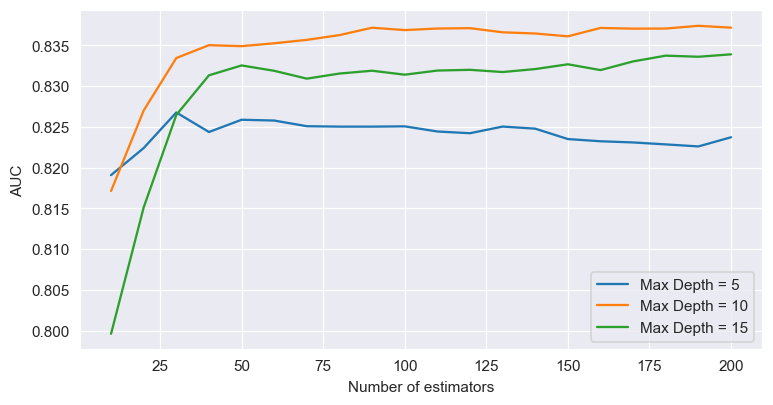

In [34]:
plt.figure(figsize=(8, 4), dpi=110)

sns.set_style('darkgrid')

for d in [5, 10, 15]:
    rf_scores_2_subset = rf_scores_2[rf_scores_2.max_depth == d]
    
    ax = sns.lineplot(x='n_estimators', y='auc', data=rf_scores_2_subset, label=f'Max Depth = {d}')

ax.set(xlabel='Number of estimators', ylabel='AUC')

ax.legend()

Models with a maximum depth of 10 outperformed models with maximum depth 5 or 15. This suggests a sweet spot in which trees have a sufficient number of conditions to make accurate inferences and don't risk overfitting.

In [35]:
max_depth = 10

In [36]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [37]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
rf_scores_3 = pd.DataFrame(scores, columns=columns)

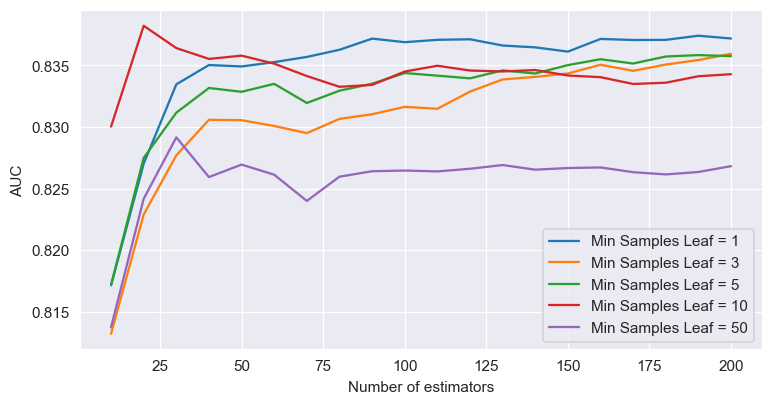

In [38]:
plt.figure(figsize=(8, 4), dpi=110)

sns.set_style('darkgrid')

for d in [1, 3, 5, 10, 50]:
    rf_scores_3_subset = rf_scores_3[rf_scores_3.min_samples_leaf == d]
    
    ax = sns.lineplot(x='n_estimators', y='auc', data=rf_scores_3_subset, label=f'Min Samples Leaf = {d}')

ax.set(xlabel='Number of estimators', ylabel='AUC')

ax.legend()

In this case, increasing the min_samples_leaf value seems to result in suboptimal performance.

In [39]:
min_samples_leaf = 1

In [40]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=1)

Having explored some of the parameter space above, we train the final random forest model using a combination of parameters which led to the model performing best.

`max_features`, `bootstrap` and `n_jobs` are additional features which warrant some consideration when training a random forest model.

### Gradient Boosting and XGBoost

Gradient boosting is an alternative method to combining multiple decision trees into one ensemble. Boosting is an iterative process of training models, examining the errors the models are making and then training additional models which correct the mistakes of its predecessors. The final step combines all of the **boosted trees** to produce the best possible model.

In [41]:
import xgboost as xgb

#### Initialising XGBoost

In [45]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, y_train, feature_names=features)
dval = xgb.DMatrix(X_val, y_val, feature_names=features)

In [104]:
%%capture output

xgb_params = {
    'eta' : 0.05,
    'max_depth' : 6,
    'min_child_weight' : 1,

    'objective' : 'binary:logistic',
    'eval_metric' : 'auc',
    'nthread' : 6,

    'seed' : 1,
    'verbosity' : 1,
}

watchlist = [
    (dtrain, 'train'),
    (dval, 'val')
]

model = xgb.train(xgb_params, dtrain, evals=watchlist, num_boost_round = 200)

In [78]:
y_pred = model.predict(dval)

roc_auc_score(y_val, y_pred)

0.8026383503631856

Implementing XGBoost with just the default parameters returns an impressive score of ~0.82. NOTE: XGBoost is quite prone to overfitting, so we don't want the number of trees to be too high. Using a watchlist enables us to monitor model iterations which are immediately evaluated on the validation data.

#### Parsing XGBoost Results

In [75]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [80]:
df_score = parse_xgb_output(output)

df_score.sample()

,num_iter,train_auc,val_auc
28,28,0.97571,0.82567
190,190,1.00000,0.80412
101,101,0.99975,0.81397
11,11,0.94165,0.82665
52,52,0.99105,0.82335
46,46,0.98934,0.82492
158,158,1.00000,0.80805
182,182,1.00000,0.80458
0,0,0.84424,0.78621
184,184,1.00000,0.80488


Text(0, 0.5, 'AUC')

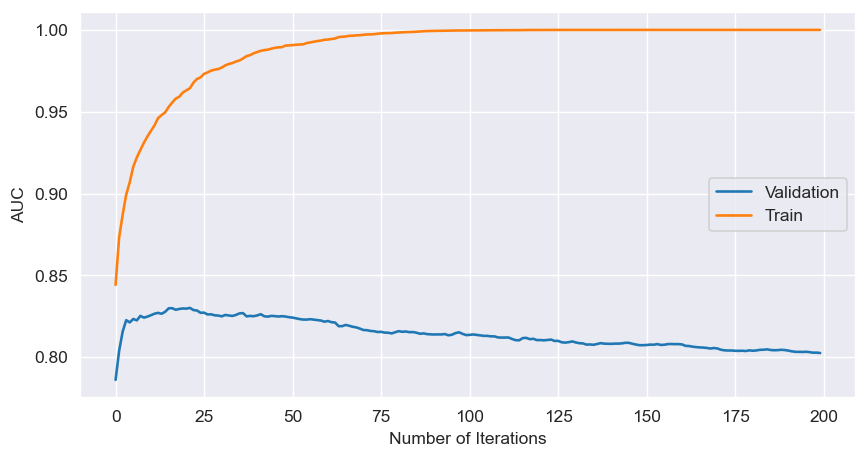

In [88]:
plt.figure(figsize = (8, 4), dpi = 125)

sns.lineplot(x = 'num_iter', y = 'val_auc', data=df_score, label='Validation')
sns.lineplot(x = 'num_iter', y = 'train_auc', data=df_score, label='Train')

plt.xlabel('Number of Iterations')
plt.ylabel('AUC')

Overfitting is demonstrated by the continuous increase in training AUC which results in the validation AUC decreasing.

### XGB - Hyperparameter Tuning

1. `eta` = Learning Rate (Influences model weightings)

2. `max_depth` = Depth of decision trees

3. `min_child_weight` = Similar to `min_samples_leaf`


In [92]:
scores = {}

In [105]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)

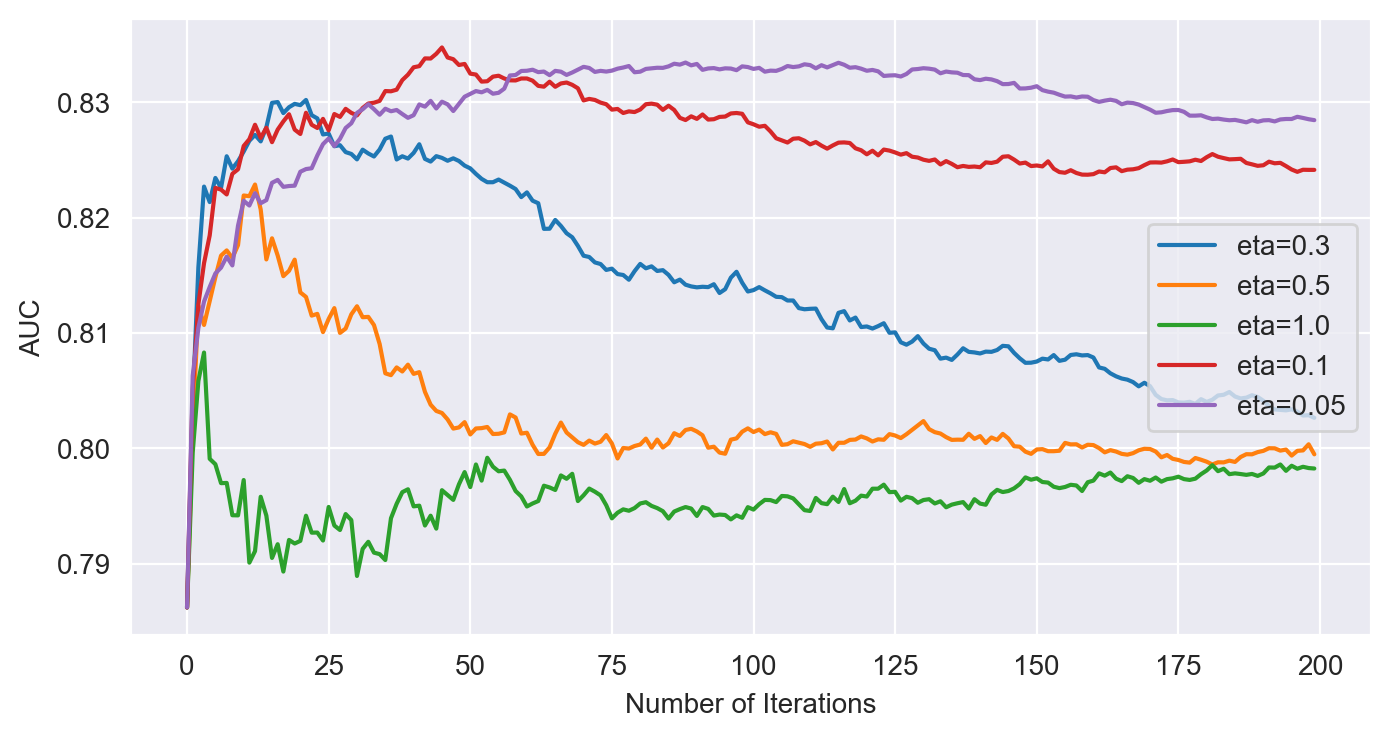

In [108]:
plt.figure(figsize = (8, 4), dpi = 200)

for key, df_score in scores.items():

    sns.lineplot(x = 'num_iter', y = 'val_auc', data=df_score, label=key)

    plt.xlabel('Number of Iterations')
    plt.ylabel('AUC')

The model learns better when the rate of learning is slower and has more iterations, whereas a high learning rate results in the model making lots of errors after a few iterations. Similarly to the concept of balancing time complexity, stability and accuracy in mathematical modelling.

In [109]:
scores = {}

In [116]:
%%capture output

xgb_params = {
    'eta' : 0.05,
    'max_depth' : 10,
    'min_child_weight' : 1,

    'objective' : 'binary:logistic',
    'eval_metric' : 'auc',
    'nthread' : 6,

    'seed' : 1,
    'verbosity' : 1,
}

watchlist = [
    (dtrain, 'train'),
    (dval, 'val')
]

model = xgb.train(xgb_params, dtrain, evals=watchlist, num_boost_round = 200)

key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)

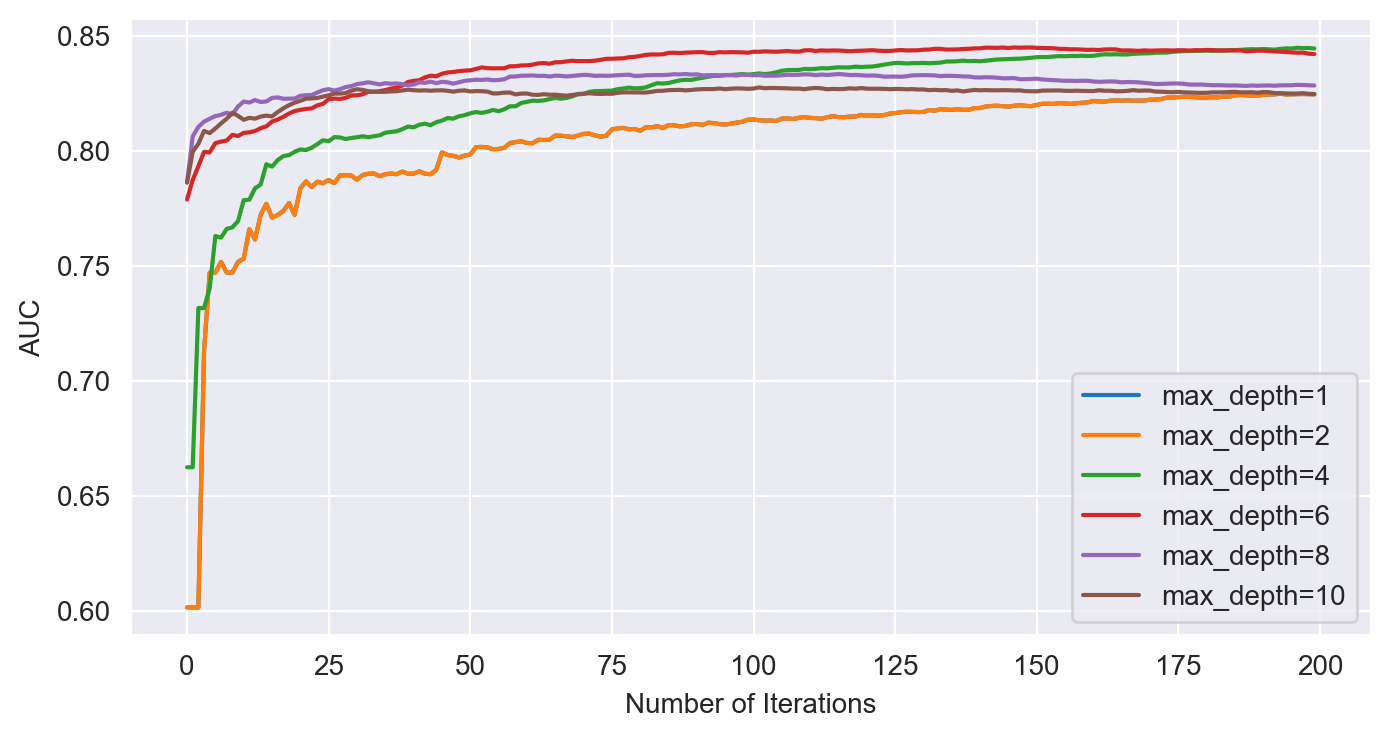

In [117]:
plt.figure(figsize = (8, 4), dpi = 200)

for key, df_score in scores.items():

    sns.lineplot(x = 'num_iter', y = 'val_auc', data=df_score, label=key)

    plt.xlabel('Number of Iterations')
    plt.ylabel('AUC')

In [128]:
scores = {}

In [133]:
%%capture output

xgb_params = {
    'eta' : 0.05,
    'max_depth' : 6,
    'min_child_weight' : 100,

    'objective' : 'binary:logistic',
    'eval_metric' : 'auc',
    'nthread' : 6,

    'seed' : 1,
    'verbosity' : 1,
}

watchlist = [
    (dtrain, 'train'),
    (dval, 'val')
]

model = xgb.train(xgb_params, dtrain, evals=watchlist, num_boost_round = 200)

key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)

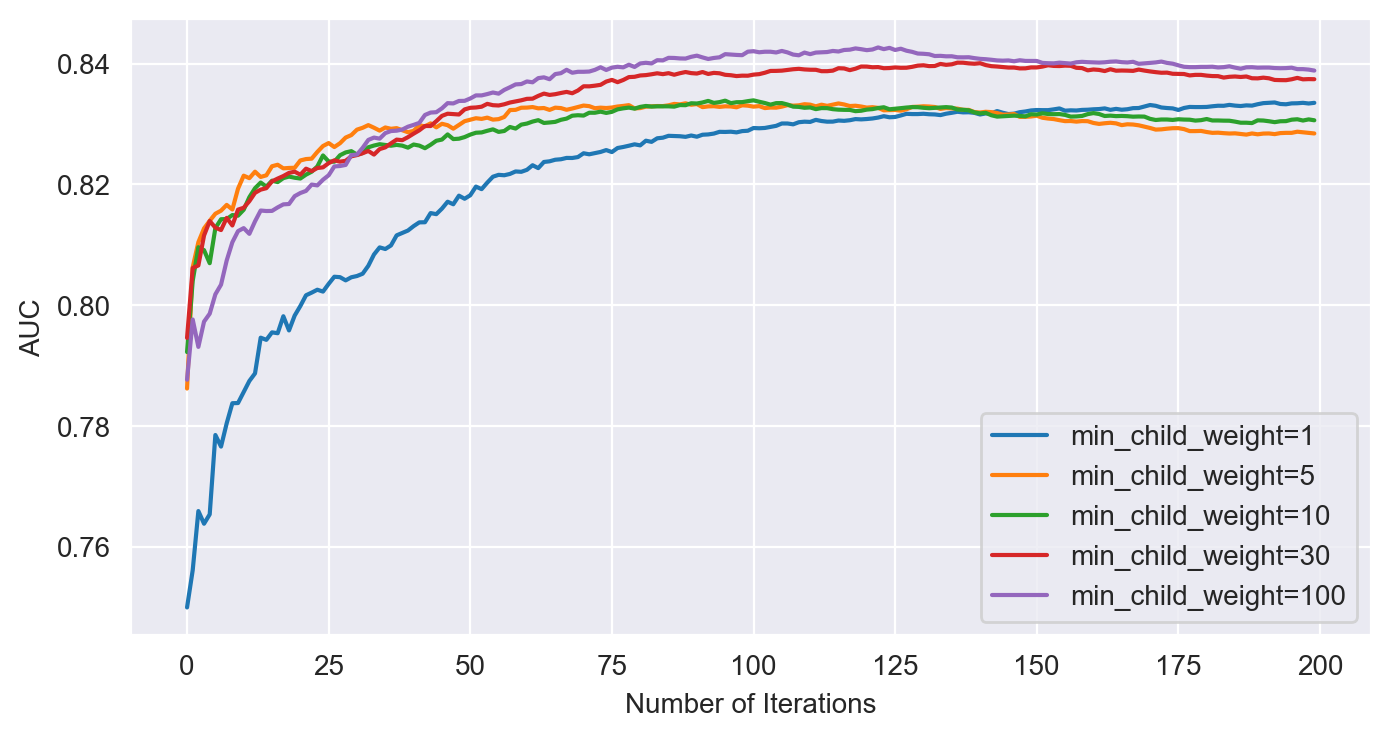

In [134]:
plt.figure(figsize = (8, 4), dpi = 200)

for key, df_score in scores.items():

    sns.lineplot(x = 'num_iter', y = 'val_auc', data=df_score, label=key)

    plt.xlabel('Number of Iterations')
    plt.ylabel('AUC')

In [135]:
%%capture output

xgb_params = {
    'eta' : 0.05,
    'max_depth' : 6,
    'min_child_weight' : 100,

    'objective' : 'binary:logistic',
    'eval_metric' : 'auc',
    
    'nthread' : 6,
    'seed' : 1,
    'verbosity' : 1,
}

watchlist = [
    (dtrain, 'train'),
    (dval, 'val')
]

model = xgb.train(xgb_params, dtrain, evals=watchlist, num_boost_round = 200)

Some other parameters which are useful to tune include:
- `subsample` 
- `colsample_bytree`
- `lambda` 
- `alpha`

### Selecting the Final Model

In [136]:
dt = DecisionTreeClassifier(max_depth=6,
                            min_samples_leaf=15)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_val)[:, 1]

roc_auc_score(y_val, y_pred)

0.7786590611778295

In [137]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=10,
                            min_samples_leaf=3,
                            random_state=1)
rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_val)[:, 1]

roc_auc_score(y_val, y_pred)

0.8359437916661756

In [146]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 5,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

y_pred = model.predict(dval)

roc_auc_score(y_val, y_pred)

0.8447592446366768

In [153]:
full_train_dicts = full_train.to_dict(orient='records')
test_dicts = test.to_dict(orient='records')

X_full_train = dv.fit_transform(full_train_dicts)
X_test = dv.transform(test_dicts)

dfulltrain = xgb.DMatrix(X_full_train, y_full_train, feature_names=features)
dtest = xgb.DMatrix(X_test, y_test, feature_names=features)

model = xgb.train(xgb_params, dfulltrain, num_boost_round=175)

y_pred = model.predict(dtest)

roc_auc_score(y_test, y_pred)

0.8309588974145936

In [154]:
import catboost

In [156]:
model = catboost.CatBoostClassifier()
model.fit(X_full_train, y_full_train)

y_pred = model.predict_proba(X_test)[:, 1]

roc_auc_score(y_test, y_pred)

Learning rate set to 0.017724
0:	learn: 0.6853993	total: 6.03ms	remaining: 6.02s
1:	learn: 0.6752951	total: 12.2ms	remaining: 6.1s
2:	learn: 0.6668601	total: 18.3ms	remaining: 6.09s
3:	learn: 0.6581351	total: 25.8ms	remaining: 6.42s
4:	learn: 0.6492387	total: 32.1ms	remaining: 6.39s
5:	learn: 0.6417210	total: 39.3ms	remaining: 6.52s
6:	learn: 0.6341337	total: 45.9ms	remaining: 6.51s
7:	learn: 0.6264364	total: 52.6ms	remaining: 6.52s
8:	learn: 0.6196818	total: 59.1ms	remaining: 6.51s
9:	learn: 0.6129564	total: 65.7ms	remaining: 6.5s
10:	learn: 0.6071484	total: 72.3ms	remaining: 6.5s
11:	learn: 0.6005410	total: 78.8ms	remaining: 6.49s
12:	learn: 0.5943589	total: 85.6ms	remaining: 6.5s
13:	learn: 0.5890612	total: 91.7ms	remaining: 6.46s
14:	learn: 0.5838163	total: 98.5ms	remaining: 6.47s
15:	learn: 0.5781772	total: 107ms	remaining: 6.55s
16:	learn: 0.5722993	total: 114ms	remaining: 6.57s
17:	learn: 0.5671203	total: 120ms	remaining: 6.56s
18:	learn: 0.5621932	total: 127ms	remaining: 6.53s


0.8342212013098088

### Conclusions / Summary

Decision trees learn if-then-else rules from data.

Finding the best split: select the least impure split. This algorithm can overfit, that's why we control it by limiting the max depth and the size of the group.

Random forest is a way of combininig multiple decision trees. It should have a diverse set of models to make good predictions.

Gradient boosting trains model sequentially: each model tries to fix errors of the previous model. XGBoost is an implementation of gradient boosting. CatBoost and LightGBM are two more examples of gradient-boosting frameworks for machine learning.